Chapter 13

# 对称矩阵的特征值分解
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用特征值分解展示矩阵 $A$ 对单位圆和向量的逐步变换效果。初始几何形状是单位圆和两个相互垂直的向量，通过应用矩阵 $A$ 及其特征值分解逐步变换，观察其形变过程。

首先，代码生成单位圆和两个方向的向量，以 $(x_1, x_2)$ 平面上的单位圆和一对初始基向量 $V_{\text{vec}} = \begin{bmatrix} \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix}$ 为基础。然后，定义对称矩阵 $A = \begin{bmatrix} 1.25 & -0.75 \\ -0.75 & 1.25 \end{bmatrix}$，计算其特征值分解 $A = V \Lambda V^T$，得到特征值对角矩阵 $\Lambda$ 和特征向量矩阵 $V$，其中 $\Lambda$ 表示沿特征向量方向的拉伸程度，$V$ 表示变换的旋转方向。

接下来，代码逐步展示以下几个变换过程：
1. **初始单位圆和向量**：绘制未变换的单位圆和基向量。
2. **$A$ 变换**：直接对单位圆应用矩阵 $A$，展示其整体变换效果。此变换体现了 $A$ 在各方向上的旋转和拉伸效果。
3. **$V^T$ 变换**：将单位圆和向量与特征向量矩阵 $V^T$ 相乘，将圆和向量转至特征值方向，使后续变换可以沿特征方向操作。
4. **$\Lambda V^T$ 变换**：再对结果应用特征值对角矩阵 $\Lambda$，展示特征方向上不同缩放系数的影响。
5. **$V \Lambda V^T$ 变换**：将矩阵 $V$ 应用于已缩放的形状，将其旋转回初始坐标系，完成完整变换。

通过特征值分解，矩阵 $A$ 的变换被分解为旋转、拉伸、再旋转的步骤，使得每一步的几何效果得以清晰展示，最终的结果与直接应用 $A$ 变换的效果一致，体现了特征值分解的几何意义。

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库

## 定义可视化函数 visualize，用于绘制圆和变换向量

In [2]:
def visualize(X_circle, X_vec, title_txt):  # 绘制输入圆和变换后的向量，显示标题
    fig, ax = plt.subplots()  # 创建绘图
    plt.plot(X_circle[0, :], X_circle[1, :], 'k', linestyle='--', linewidth=0.5)  # 绘制原始圆

    plt.quiver(0, 0, X_vec[0, 0], X_vec[1, 0],  # 绘制第一个向量
               angles='xy', scale_units='xy', scale=1,
               color=[0, 0.4392, 0.7529])

    plt.quiver(0, 0, X_vec[0, 1], X_vec[1, 1],  # 绘制第二个向量
               angles='xy', scale_units='xy', scale=1,
               color=[1, 0, 0])

    plt.axvline(x=0, color='k', zorder=0)  # 绘制 y 轴
    plt.axhline(y=0, color='k', zorder=0)  # 绘制 x 轴

    plt.ylabel('$x_2$')  # y 轴标签
    plt.xlabel('$x_1$')  # x 轴标签

    ax.set_aspect(1)  # 设置坐标比例
    ax.set_xlim([-2.5, 2.5])  # x 轴范围
    ax.set_ylim([-2.5, 2.5])  # y 轴范围
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格线
    ax.set_xticks(np.linspace(-2, 2, 5))  # 设置 x 轴刻度
    ax.set_yticks(np.linspace(-2, 2, 5))  # 设置 y 轴刻度
    plt.title(title_txt)  # 设置标题
    plt.show()

## 绘制原始单位圆和向量

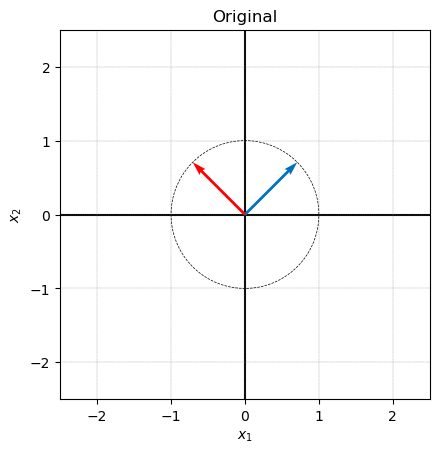

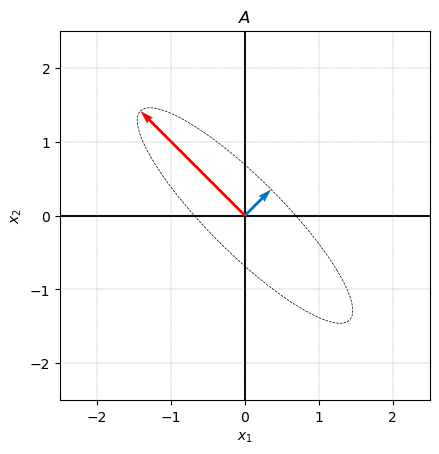

In [3]:
theta = np.linspace(0, 2 * np.pi, 100)  # 创建角度数组

circle_x1 = np.cos(theta)  # 计算圆 x 方向坐标
circle_x2 = np.sin(theta)  # 计算圆 y 方向坐标

V_vec = np.array([[np.sqrt(2) / 2, -np.sqrt(2) / 2],  # 定义初始向量矩阵
                  [np.sqrt(2) / 2, np.sqrt(2) / 2]])

X_circle = np.array([circle_x1, circle_x2])  # 创建单位圆矩阵

visualize(X_circle, V_vec, 'Original')  # 绘制原始单位圆和向量

## 定义矩阵 A
A = np.array([[1.25, -0.75],  # 定义 2x2 非对称矩阵 A
              [-0.75, 1.25]])

visualize(A @ X_circle, A @ V_vec, '$A$')  # 绘制 A 变换后的圆和向量

## 特征值分解 A = V @ D @ V.T

In [4]:
lambdas, V = np.linalg.eig(A)  # 获取 A 的特征值和特征向量

In [5]:
D = np.diag(np.flip(lambdas))  # 创建特征值对角矩阵

In [6]:
V = V.T  # 将特征向量矩阵转置以便变换

In [7]:
print('=== LAMBDA ===')  # 输出特征值矩阵
print(D)

=== LAMBDA ===
[[0.5 0. ]
 [0.  2. ]]


In [8]:
print('=== V ===')  # 输出特征向量矩阵
print(V)

=== V ===
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


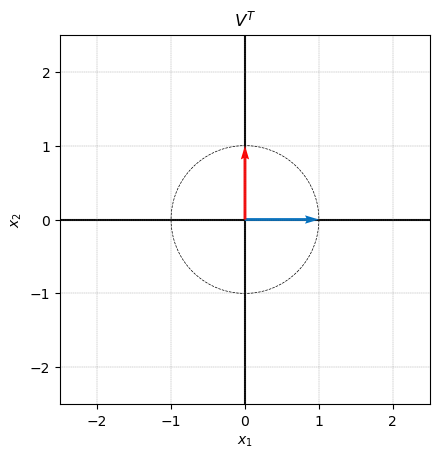

In [9]:
visualize(V.T @ X_circle, V.T @ V_vec, '$V^T$')  # 绘制 V.T 变换

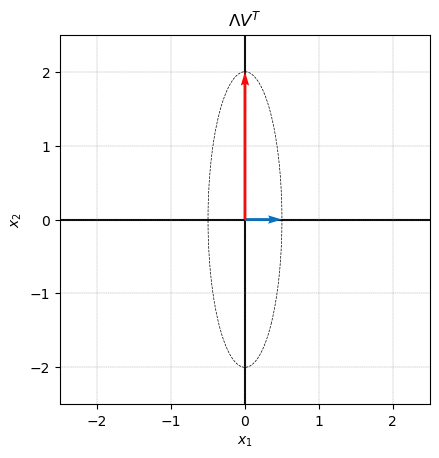

In [10]:
visualize(D @ V.T @ X_circle, D @ V.T @ V_vec, '$\u039BV^T$')  # 绘制 D @ V.T 变换

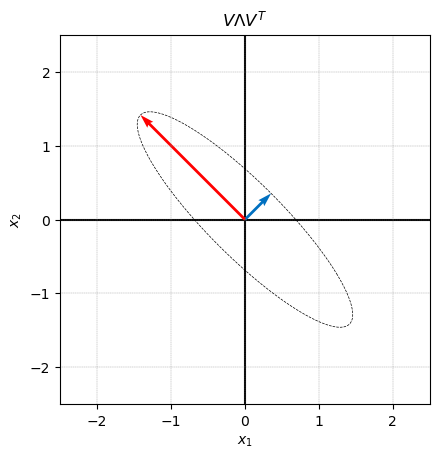

In [11]:
visualize(V @ D @ V.T @ X_circle, V @ D @ V.T @ V_vec, '$V\u039BV^T$')  # 绘制 V @ D @ V.T 变换

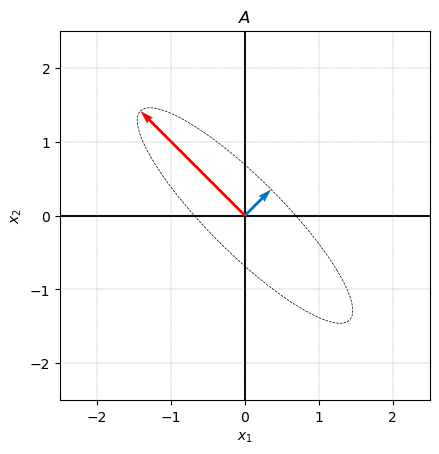

In [12]:
visualize(A @ X_circle, A @ V_vec, '$A$')  # 绘制 A 变换